In [13]:
#libraries for data cleaning
import numpy as np
import pandas as pd

#libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preparation

In [2]:
df=pd.read_csv("voice.csv")

In [3]:
df.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
from sklearn.preprocessing import LabelEncoder
#label encoding our label column
le=LabelEncoder()
le.fit(df.label)
df.label=le.transform(df.label)

In [8]:
from sklearn.model_selection import train_test_split
#preparing our data for train test split
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=38)

### ADA BOOST

In [9]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=100,learning_rate=1)
model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [10]:
model.score(X_test,y_test)

0.9737118822292324

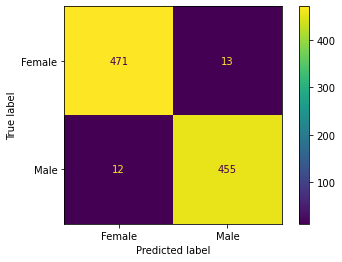

In [12]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=["Female","Male"])

#### Tweaked Adaboost

In [15]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
model2=AdaBoostClassifier(n_estimators=100,base_estimator=logreg,learning_rate=1)
model2.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=1,
                   n_estimators=100)

In [ ]:
model2.score(X_test,y)